# 1. Import necessary Libraries

In [1]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import random

# 2. Import and load the data file
The data file is in JSON format so we used the json package to parse the JSON file into Python.

In [2]:
words=[]
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open('intents.json', encoding='utf-8').read()
intents = json.loads(data_file)

# 3. Preprocess data
1. Tokenization - Process of breaking the whole text into small parts like words. (Iterate through the patterns and tokenize the sentence using nltk.word_tokenize() function)
2. Append each word in the words list
3. Create a list of classes for tags
4. Lemmatization and remove duplicates

In [3]:
for intent in intents['intents']:
    for pattern in intent['patterns']:

        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        
        #add documents in the corpus
        documents.append((w, intent['tag']))

        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])
            
# lemmaztize and lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))
# sort classes
classes = sorted(list(set(classes)))
# documents = combination between patterns and intents
print (len(documents), "documents")
# classes = intents
print (len(classes), "classes", classes)
# words = all words, vocabulary
print (len(words), "unique lemmatized words", words)

pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

307 documents
64 classes ['Lifestyle_treatments', 'Psychotherapy', 'age', 'anger', 'anxiety', 'botgreeting', 'buddy', 'buddyhelp', 'causes', 'ccd', 'couns-contact', 'counselor', 'difference', 'doing_great', 'earlysigns', 'emo-how', 'emo-mstate', 'fact_ADHD_disorder', 'fact_BPD_disorder', 'fact_anxiety', 'fact_depression', 'fact_dissociative_disorder', 'fact_eating_disorder', 'fact_mdd_disorder', 'fact_mood_disorder', 'fact_ocd_disorder', 'fact_personality_disorder', 'fact_psychosis_disorder', 'fact_ptsd_disorder', 'fact_schizo', 'fact_social_anxiety_disorder', 'fail', 'fear', 'function', 'gethelp', 'good_mental_health', 'goodbye', 'greeting', 'greeting2', 'how_are_you', 'intro', 'invalid', 'list-emotions', 'medication', 'mental_health_exercise', 'mental_state', 'mhealth', 'millness', 'mmu', 'mstate-stage', 'neutral', 'percentage', 'random', 'recover', 'relationship', 'responsibilty', 'risk', 'sad', 'session', 'sorry', 'suicidal', 'symptoms', 'talk-buddy', 'thanks']
313 unique lemmatize

# 4. Create training and testing data
Our input will be the pattern and output will be the class our input pattern belongs to

In [4]:
from sklearn.model_selection import train_test_split

# create our training data
training = []
# create an empty array for our output
output_empty = [0] * len(classes)
# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    
    training.append([bag, output_row])
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
# create train and test lists. X - patterns, Y - intents
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data created")
print(bag)
X_train, X_test, Y_train, Y_test = train_test_split(np.array(train_x), np.array(train_y), test_size=0.2)

Training data created
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


<ipython-input-4-affc285901bd>:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  training = np.array(training)


In [5]:
words

["'s",
 "'ve",
 '(',
 ')',
 ',',
 'a',
 'able',
 'about',
 'affect',
 'affected',
 'again',
 'age',
 'agitated',
 'alright',
 'alternative',
 'am',
 'among',
 'and',
 'angry',
 'annoyed',
 'anxiety',
 'anxious',
 'any',
 'anyone',
 'anything',
 'appreciate',
 'are',
 'asking',
 'assalamualaikum',
 'attention',
 'awesome',
 'bad',
 'basic',
 'be',
 'been',
 'best',
 'better',
 'between',
 'book',
 'borderline',
 'boring',
 'bot',
 'boy',
 'bring',
 'brother',
 'buddy',
 'buhbye',
 'buidling',
 'by',
 'bye',
 'byeee',
 'ca',
 'can',
 'case',
 'categorize',
 'category',
 'cause',
 'chance',
 'characteristic',
 'chatbot',
 'check',
 'compulsive',
 'concentrate',
 'conselor',
 'contact',
 'cool',
 'could',
 'counseling',
 'counsellor',
 'counselor',
 'crazy',
 'cry',
 'curable',
 'cure',
 'cured',
 'day',
 'deficit',
 'define',
 'depression',
 'depressive',
 'describe',
 'description',
 'detect',
 'determine',
 'developing',
 'diagnosed',
 'differ',
 'difference',
 'different',
 'difficult'

# 5. Create model 
The model created has 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons equal to number of intents to predict output intent with softmax. 

This model uses the Keras sequential API for this. After training the model for 200 epochs, we achieved 94% accuracy on the model created. The model is saved as ‘chatbot_model.h5’.

In [6]:
model = Sequential()
model.add(Dense(256, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

In [7]:
from keras import backend as K
#Define function F1, Precision and Recall

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [8]:
# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc',f1_m,precision_m, recall_m])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               80384     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
Total params: 121,536
Trainable params: 121,536
Non-trainable params: 0
_________________________________________________________________


In [9]:
np.array(train_x).shape

(307, 313)

In [10]:
np.array(train_y).shape

(307, 64)

In [11]:
#fitting and saving the model 
hist = model.fit(X_train, Y_train, epochs=400, batch_size=5, verbose=1, validation_data=(X_test, Y_test))
model.save('chatbot_model.h5', hist)

print("model created")

Epoch 1/400
49/49 [==============================] - 3s 38ms/step - loss: 4.1476 - acc: 0.0352 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 4.0598 - val_acc: 0.0484 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/400
49/49 [==============================] - 0s 3ms/step - loss: 3.9809 - acc: 0.0838 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 3.9233 - val_acc: 0.1129 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/400
49/49 [==============================] - 0s 4ms/step - loss: 3.7175 - acc: 0.1128 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 3.7484 - val_acc: 0.1452 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/400
49/49 [==============================] - 0s 4ms/step - loss: 3.4461 - acc: 0.1654 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 

49/49 [==============================] - 0s 3ms/step - loss: 0.6029 - acc: 0.8108 - f1_m: 0.7663 - precision_m: 0.8541 - recall_m: 0.7071 - val_loss: 2.6242 - val_acc: 0.4677 - val_f1_m: 0.4345 - val_precision_m: 0.5346 - val_recall_m: 0.3846
Epoch 33/400
49/49 [==============================] - 0s 3ms/step - loss: 0.5717 - acc: 0.8138 - f1_m: 0.8104 - precision_m: 0.9078 - recall_m: 0.7440 - val_loss: 2.5924 - val_acc: 0.4839 - val_f1_m: 0.4505 - val_precision_m: 0.5821 - val_recall_m: 0.3846
Epoch 34/400
49/49 [==============================] - 0s 3ms/step - loss: 0.4518 - acc: 0.8844 - f1_m: 0.8816 - precision_m: 0.9473 - recall_m: 0.8372 - val_loss: 2.5744 - val_acc: 0.4839 - val_f1_m: 0.4556 - val_precision_m: 0.5154 - val_recall_m: 0.4154
Epoch 35/400
49/49 [==============================] - 0s 3ms/step - loss: 0.4918 - acc: 0.8858 - f1_m: 0.8426 - precision_m: 0.9474 - recall_m: 0.7845 - val_loss: 2.4942 - val_acc: 0.4839 - val_f1_m: 0.4269 - val_precision_m: 0.5282 - val_recall

49/49 [==============================] - 0s 3ms/step - loss: 0.2325 - acc: 0.9364 - f1_m: 0.9217 - precision_m: 0.9535 - recall_m: 0.8962 - val_loss: 3.1147 - val_acc: 0.4677 - val_f1_m: 0.4474 - val_precision_m: 0.4923 - val_recall_m: 0.4154
Epoch 65/400
49/49 [==============================] - 0s 4ms/step - loss: 0.1674 - acc: 0.9559 - f1_m: 0.9480 - precision_m: 0.9702 - recall_m: 0.9311 - val_loss: 3.2689 - val_acc: 0.4355 - val_f1_m: 0.4264 - val_precision_m: 0.5000 - val_recall_m: 0.3846
Epoch 66/400
49/49 [==============================] - 0s 3ms/step - loss: 0.1875 - acc: 0.9432 - f1_m: 0.9434 - precision_m: 0.9818 - recall_m: 0.9127 - val_loss: 3.2039 - val_acc: 0.4516 - val_f1_m: 0.4489 - val_precision_m: 0.5038 - val_recall_m: 0.4154
Epoch 67/400
49/49 [==============================] - 0s 3ms/step - loss: 0.2048 - acc: 0.9645 - f1_m: 0.9272 - precision_m: 0.9701 - recall_m: 0.8937 - val_loss: 3.1958 - val_acc: 0.4677 - val_f1_m: 0.4350 - val_precision_m: 0.5077 - val_recall

49/49 [==============================] - 0s 4ms/step - loss: 0.1283 - acc: 0.9702 - f1_m: 0.9599 - precision_m: 0.9743 - recall_m: 0.9489 - val_loss: 3.6507 - val_acc: 0.4355 - val_f1_m: 0.4496 - val_precision_m: 0.5051 - val_recall_m: 0.4154
Epoch 97/400
49/49 [==============================] - 0s 4ms/step - loss: 0.1551 - acc: 0.9293 - f1_m: 0.9347 - precision_m: 0.9653 - recall_m: 0.9102 - val_loss: 3.7455 - val_acc: 0.4516 - val_f1_m: 0.4534 - val_precision_m: 0.5410 - val_recall_m: 0.4154
Epoch 98/400
49/49 [==============================] - 0s 4ms/step - loss: 0.1019 - acc: 0.9651 - f1_m: 0.9623 - precision_m: 0.9741 - recall_m: 0.9528 - val_loss: 3.6459 - val_acc: 0.4839 - val_f1_m: 0.4613 - val_precision_m: 0.5141 - val_recall_m: 0.4308
Epoch 99/400
49/49 [==============================] - 0s 4ms/step - loss: 0.1025 - acc: 0.9782 - f1_m: 0.9814 - precision_m: 0.9979 - recall_m: 0.9682 - val_loss: 3.6540 - val_acc: 0.5000 - val_f1_m: 0.4855 - val_precision_m: 0.5218 - val_recall

Epoch 128/400
49/49 [==============================] - 0s 3ms/step - loss: 0.1185 - acc: 0.9596 - f1_m: 0.9689 - precision_m: 0.9805 - recall_m: 0.9596 - val_loss: 3.9857 - val_acc: 0.4677 - val_f1_m: 0.4624 - val_precision_m: 0.4859 - val_recall_m: 0.4462
Epoch 129/400
49/49 [==============================] - 0s 3ms/step - loss: 0.0832 - acc: 0.9729 - f1_m: 0.9683 - precision_m: 0.9770 - recall_m: 0.9615 - val_loss: 3.9905 - val_acc: 0.4677 - val_f1_m: 0.4752 - val_precision_m: 0.5179 - val_recall_m: 0.4462
Epoch 130/400
49/49 [==============================] - 0s 3ms/step - loss: 0.1119 - acc: 0.9434 - f1_m: 0.9622 - precision_m: 0.9882 - recall_m: 0.9414 - val_loss: 3.9228 - val_acc: 0.4839 - val_f1_m: 0.4812 - val_precision_m: 0.5282 - val_recall_m: 0.4462
Epoch 131/400
49/49 [==============================] - 0s 4ms/step - loss: 0.1068 - acc: 0.9537 - f1_m: 0.9609 - precision_m: 0.9726 - recall_m: 0.9516 - val_loss: 3.8742 - val_acc: 0.5000 - val_f1_m: 0.4957 - val_precision_m: 0.

Epoch 160/400
49/49 [==============================] - 0s 3ms/step - loss: 0.0606 - acc: 0.9825 - f1_m: 0.9800 - precision_m: 0.9872 - recall_m: 0.9743 - val_loss: 4.1174 - val_acc: 0.4677 - val_f1_m: 0.4556 - val_precision_m: 0.4897 - val_recall_m: 0.4308
Epoch 161/400
49/49 [==============================] - 0s 3ms/step - loss: 0.0609 - acc: 0.9904 - f1_m: 0.9830 - precision_m: 0.9904 - recall_m: 0.9770 - val_loss: 4.1645 - val_acc: 0.4677 - val_f1_m: 0.4598 - val_precision_m: 0.5026 - val_recall_m: 0.4308
Epoch 162/400
49/49 [==============================] - 0s 3ms/step - loss: 0.1049 - acc: 0.9665 - f1_m: 0.9526 - precision_m: 0.9676 - recall_m: 0.9406 - val_loss: 4.1087 - val_acc: 0.4677 - val_f1_m: 0.4675 - val_precision_m: 0.4974 - val_recall_m: 0.4462
Epoch 163/400
49/49 [==============================] - 0s 4ms/step - loss: 0.0520 - acc: 0.9773 - f1_m: 0.9777 - precision_m: 0.9804 - recall_m: 0.9755 - val_loss: 4.1543 - val_acc: 0.4677 - val_f1_m: 0.4786 - val_precision_m: 0.

Epoch 192/400
49/49 [==============================] - 0s 4ms/step - loss: 0.0609 - acc: 0.9714 - f1_m: 0.9714 - precision_m: 0.9714 - recall_m: 0.9714 - val_loss: 4.4494 - val_acc: 0.4839 - val_f1_m: 0.4632 - val_precision_m: 0.4910 - val_recall_m: 0.4462
Epoch 193/400
49/49 [==============================] - 0s 5ms/step - loss: 0.1230 - acc: 0.9528 - f1_m: 0.9533 - precision_m: 0.9603 - recall_m: 0.9477 - val_loss: 4.4355 - val_acc: 0.5000 - val_f1_m: 0.4838 - val_precision_m: 0.5179 - val_recall_m: 0.4615
Epoch 194/400
49/49 [==============================] - 0s 4ms/step - loss: 0.1125 - acc: 0.9558 - f1_m: 0.9558 - precision_m: 0.9584 - recall_m: 0.9537 - val_loss: 4.4641 - val_acc: 0.4839 - val_f1_m: 0.4726 - val_precision_m: 0.4897 - val_recall_m: 0.4615
Epoch 195/400
49/49 [==============================] - 0s 4ms/step - loss: 0.0788 - acc: 0.9512 - f1_m: 0.9532 - precision_m: 0.9558 - recall_m: 0.9512 - val_loss: 4.4935 - val_acc: 0.5000 - val_f1_m: 0.4829 - val_precision_m: 0.

Epoch 224/400
49/49 [==============================] - 0s 4ms/step - loss: 0.0433 - acc: 0.9863 - f1_m: 0.9805 - precision_m: 0.9863 - recall_m: 0.9758 - val_loss: 4.3993 - val_acc: 0.5000 - val_f1_m: 0.4752 - val_precision_m: 0.4923 - val_recall_m: 0.4615
Epoch 225/400
49/49 [==============================] - 0s 3ms/step - loss: 0.0662 - acc: 0.9677 - f1_m: 0.9686 - precision_m: 0.9740 - recall_m: 0.9643 - val_loss: 4.4382 - val_acc: 0.5000 - val_f1_m: 0.4752 - val_precision_m: 0.4923 - val_recall_m: 0.4615
Epoch 226/400
49/49 [==============================] - 0s 3ms/step - loss: 0.0860 - acc: 0.9563 - f1_m: 0.9625 - precision_m: 0.9703 - recall_m: 0.9562 - val_loss: 4.5012 - val_acc: 0.5000 - val_f1_m: 0.4906 - val_precision_m: 0.5077 - val_recall_m: 0.4769
Epoch 227/400
49/49 [==============================] - 0s 3ms/step - loss: 0.0641 - acc: 0.9759 - f1_m: 0.9737 - precision_m: 0.9822 - recall_m: 0.9670 - val_loss: 4.5693 - val_acc: 0.5161 - val_f1_m: 0.5043 - val_precision_m: 0.

Epoch 256/400
49/49 [==============================] - 0s 3ms/step - loss: 0.0748 - acc: 0.9640 - f1_m: 0.9656 - precision_m: 0.9676 - recall_m: 0.9640 - val_loss: 4.5667 - val_acc: 0.4677 - val_f1_m: 0.4624 - val_precision_m: 0.4859 - val_recall_m: 0.4462
Epoch 257/400
49/49 [==============================] - 0s 3ms/step - loss: 0.0461 - acc: 0.9863 - f1_m: 0.9823 - precision_m: 0.9863 - recall_m: 0.9792 - val_loss: 4.5535 - val_acc: 0.4677 - val_f1_m: 0.4598 - val_precision_m: 0.4769 - val_recall_m: 0.4462
Epoch 258/400
49/49 [==============================] - 0s 3ms/step - loss: 0.0862 - acc: 0.9530 - f1_m: 0.9576 - precision_m: 0.9633 - recall_m: 0.9530 - val_loss: 4.6040 - val_acc: 0.4839 - val_f1_m: 0.4769 - val_precision_m: 0.4962 - val_recall_m: 0.4615
Epoch 259/400
49/49 [==============================] - 0s 3ms/step - loss: 0.0655 - acc: 0.9754 - f1_m: 0.9733 - precision_m: 0.9754 - recall_m: 0.9721 - val_loss: 4.7065 - val_acc: 0.4839 - val_f1_m: 0.4735 - val_precision_m: 0.

Epoch 288/400
49/49 [==============================] - 0s 4ms/step - loss: 0.0452 - acc: 0.9920 - f1_m: 0.9842 - precision_m: 0.9920 - recall_m: 0.9780 - val_loss: 4.7628 - val_acc: 0.4677 - val_f1_m: 0.4581 - val_precision_m: 0.4731 - val_recall_m: 0.4462
Epoch 289/400
49/49 [==============================] - 0s 4ms/step - loss: 0.0805 - acc: 0.9588 - f1_m: 0.9565 - precision_m: 0.9686 - recall_m: 0.9469 - val_loss: 4.8450 - val_acc: 0.4516 - val_f1_m: 0.4444 - val_precision_m: 0.4615 - val_recall_m: 0.4308
Epoch 290/400
49/49 [==============================] - 0s 4ms/step - loss: 0.0600 - acc: 0.9727 - f1_m: 0.9713 - precision_m: 0.9727 - recall_m: 0.9701 - val_loss: 4.8535 - val_acc: 0.4839 - val_f1_m: 0.4791 - val_precision_m: 0.5026 - val_recall_m: 0.4615
Epoch 291/400
49/49 [==============================] - 0s 3ms/step - loss: 0.0429 - acc: 0.9892 - f1_m: 0.9892 - precision_m: 0.9892 - recall_m: 0.9892 - val_loss: 4.7765 - val_acc: 0.4677 - val_f1_m: 0.4598 - val_precision_m: 0.

Epoch 320/400
49/49 [==============================] - 0s 3ms/step - loss: 0.0257 - acc: 0.9930 - f1_m: 0.9930 - precision_m: 0.9930 - recall_m: 0.9930 - val_loss: 4.9087 - val_acc: 0.4677 - val_f1_m: 0.4466 - val_precision_m: 0.4679 - val_recall_m: 0.4308
Epoch 321/400
49/49 [==============================] - 0s 4ms/step - loss: 0.0619 - acc: 0.9745 - f1_m: 0.9738 - precision_m: 0.9771 - recall_m: 0.9712 - val_loss: 4.8427 - val_acc: 0.4839 - val_f1_m: 0.4662 - val_precision_m: 0.4962 - val_recall_m: 0.4462
Epoch 322/400
49/49 [==============================] - 0s 3ms/step - loss: 0.0411 - acc: 0.9705 - f1_m: 0.9672 - precision_m: 0.9709 - recall_m: 0.9642 - val_loss: 4.8372 - val_acc: 0.4839 - val_f1_m: 0.4564 - val_precision_m: 0.4692 - val_recall_m: 0.4462
Epoch 323/400
49/49 [==============================] - 0s 3ms/step - loss: 0.1192 - acc: 0.9471 - f1_m: 0.9482 - precision_m: 0.9497 - recall_m: 0.9471 - val_loss: 4.9128 - val_acc: 0.4677 - val_f1_m: 0.4483 - val_precision_m: 0.

Epoch 352/400
49/49 [==============================] - 0s 7ms/step - loss: 0.0876 - acc: 0.9682 - f1_m: 0.9636 - precision_m: 0.9682 - recall_m: 0.9600 - val_loss: 4.7818 - val_acc: 0.4839 - val_f1_m: 0.4791 - val_precision_m: 0.5026 - val_recall_m: 0.4615
Epoch 353/400
49/49 [==============================] - 0s 6ms/step - loss: 0.0580 - acc: 0.9663 - f1_m: 0.9664 - precision_m: 0.9713 - recall_m: 0.9625 - val_loss: 4.7756 - val_acc: 0.4839 - val_f1_m: 0.4718 - val_precision_m: 0.4846 - val_recall_m: 0.4615
Epoch 354/400
49/49 [==============================] - 0s 5ms/step - loss: 0.0671 - acc: 0.9787 - f1_m: 0.9650 - precision_m: 0.9787 - recall_m: 0.9540 - val_loss: 4.7258 - val_acc: 0.4839 - val_f1_m: 0.4752 - val_precision_m: 0.4923 - val_recall_m: 0.4615
Epoch 355/400
49/49 [==============================] - 0s 4ms/step - loss: 0.0717 - acc: 0.9604 - f1_m: 0.9613 - precision_m: 0.9625 - recall_m: 0.9604 - val_loss: 4.8121 - val_acc: 0.4839 - val_f1_m: 0.4701 - val_precision_m: 0.

Epoch 384/400
49/49 [==============================] - 0s 3ms/step - loss: 0.0485 - acc: 0.9564 - f1_m: 0.9589 - precision_m: 0.9621 - recall_m: 0.9564 - val_loss: 4.9545 - val_acc: 0.4677 - val_f1_m: 0.4564 - val_precision_m: 0.4692 - val_recall_m: 0.4462
Epoch 385/400
49/49 [==============================] - 0s 3ms/step - loss: 0.0374 - acc: 0.9881 - f1_m: 0.9881 - precision_m: 0.9881 - recall_m: 0.9881 - val_loss: 5.0110 - val_acc: 0.4839 - val_f1_m: 0.4684 - val_precision_m: 0.4769 - val_recall_m: 0.4615
Epoch 386/400
49/49 [==============================] - 0s 3ms/step - loss: 0.0398 - acc: 0.9827 - f1_m: 0.9819 - precision_m: 0.9827 - recall_m: 0.9814 - val_loss: 4.9798 - val_acc: 0.4839 - val_f1_m: 0.4718 - val_precision_m: 0.4846 - val_recall_m: 0.4615
Epoch 387/400
49/49 [==============================] - 0s 3ms/step - loss: 0.0380 - acc: 0.9853 - f1_m: 0.9853 - precision_m: 0.9875 - recall_m: 0.9835 - val_loss: 4.9839 - val_acc: 0.4839 - val_f1_m: 0.4718 - val_precision_m: 0.

In [12]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, Y_test, verbose=0)

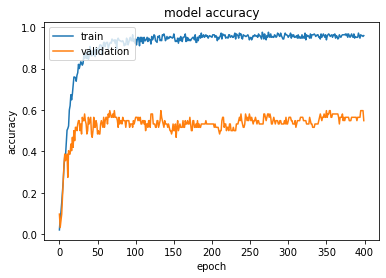

In [13]:
from matplotlib import pyplot as plt
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [26]:
print("Validation Loss: {:.2f}".format(loss))
print("Validation accuracy: {:.2f}".format(accuracy))
print("F-1 score: {:.2f}".format(f1_score))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

Validation Loss: 4.50
Validation accuracy: 0.55
F-1 score: 0.55
Precision: 0.56
Recall: 0.55
